<a href="https://colab.research.google.com/github/BeeMugo9/BeeMugo9/blob/main/Confidence_Interval_%26_Analysis_of_Student_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats

In [3]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving students.csv to students.csv


In [5]:
df1=pd.read_csv('students.csv')
print(df1)

    gender    race parental_level_of_education taken_test_preparation_course  \
0     male  Race C                 high school                            no   
1   female  Race A                 high school                            no   
2     male  Race B           bachelor's degree                           yes   
3   female  Race D                 high school                            no   
4   female  Race A                 high school                            no   
..     ...     ...                         ...                           ...   
95    male  Race A            some high school                            no   
96  female  Race A                 high school                            no   
97  female  Race E                 high school                            no   
98    male  Race E             master's degree                            no   
99  female  Race E                 high school                            no   

    maths_score  reading_score  writing

In [7]:
df1.shape

(100, 8)

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
maths_score,100.0,68.4500,14.240627,36.0,57.75,69.00,78.2500,100.0
reading_score,100.0,70.8000,13.586238,35.0,61.75,71.00,81.0000,100.0
writing_score,100.0,69.6500,13.567173,33.0,60.75,69.50,80.0000,100.0
overall_score,100.0,69.6335,13.099381,38.0,61.00,69.33,78.7525,99.0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         100 non-null    object 
 1   race                           100 non-null    object 
 2   parental_level_of_education    100 non-null    object 
 3   taken_test_preparation_course  100 non-null    object 
 4   maths_score                    100 non-null    int64  
 5   reading_score                  100 non-null    int64  
 6   writing_score                  100 non-null    int64  
 7   overall_score                  100 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [16]:
df1.head().T

,0,1,2,3,4
gender,male,female,male,female,female
race,Race C,Race A,Race B,Race D,Race A
parental_level_of_education,high school,high school,bachelor's degree,high school,high school
taken_test_preparation_course,no,no,yes,no,no
maths_score,73,71,87,63,60
reading_score,74,62,92,62,66
writing_score,74,68,89,58,66
overall_score,73.67,67.0,89.33,61.0,64.0


In [35]:
df1.head()

,gender,race,parental_level_of_education,taken_test_preparation_course,maths_score,reading_score,writing_score,overall_score,maths_zscore
0,male,Race C,high school,no,73,74,74,73.67,0.321118
1,female,Race A,high school,no,71,62,68,67.00,0.179967
2,male,Race B,bachelor's degree,yes,87,92,89,89.33,1.309174
3,female,Race D,high school,no,63,62,58,61.00,-0.384636
4,female,Race A,high school,no,60,66,66,64.00,-0.596362


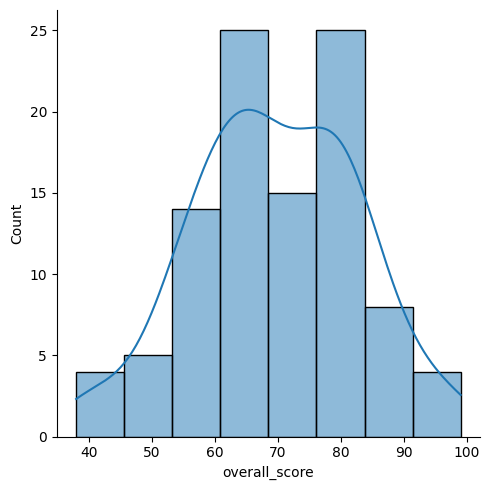

In [13]:
# plot a density curve of the distribution of the scores
sns.displot(df1.overall_score,kde=True)
plt.show()

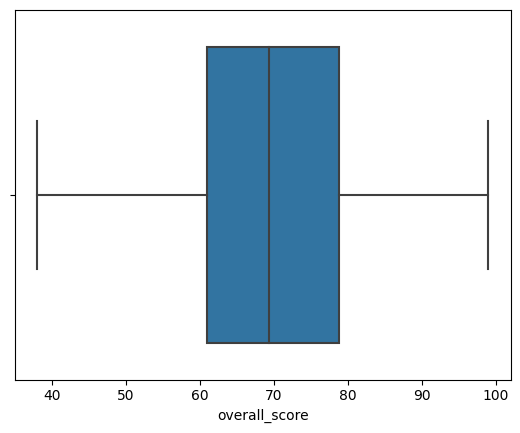

In [14]:
# plot a boxplot to check outliers
sns.boxplot(x =df1.overall_score)
plt.show()

In [15]:
# import the required function
from scipy.stats import norm

# calculate the value of sample mean
x_bar = df1.overall_score.mean()

# population standard deviation is known to be 10
sigma = 10

#sample size
n = 100

# construct the confidence interval

confidence_interval = np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

confidence_interval

array([67.67, 71.59])

Using the above mean and standard deviation, find the range on which the z-score for the maths score of the 5th student lies.

In [46]:
# mean and std_dev of maths score
df1['maths_score'].mean(),df1['maths_score'].std()

(68.45, 14.240626901420267)

In [47]:
# z_score of maths_score of 5th student
(df1['maths_score'][4]-df1['maths_score'].mean())/df1['maths_score'].std()

-0.5933727537765388

Suppose that the reading scores follow a normal distribution with a mean of 71 and standard deviation of 13 and the writing scores follow a normal distribution with a mean of 69 and standard deviation of 10. In which subject, the 5th student has performed the best?

7.193386424080761

In [22]:


# Extracting the 5th student's reading and writing scores
fifth_srs = df1.loc[4, 'reading_score']
fifth_sws = df1.loc[4, 'writing_score']

# Mean and standard deviation for reading and writing scores
mean_r, std_r = 71, 13
mean_w, std_w = 69, 10

# Calculating z-scores for reading and writing
z_score_r = (fifth_srs - mean_r) / std_r
z_score_w = (fifth_sws - mean_w) / std_w

# Comparing z-scores to determine better performance
better_performance = "reading" if z_score_r > z_score_w else "writing"
z_score_r, z_score_w, better_performance


(-0.38461538461538464, -0.3, 'writing')

Suppose the reading scores follow a normal distribution with a mean of 71 and a standard deviation of 13. Find the range on which the probability that a student will score more than 90 in reading lies.

In [49]:
# probability (in percentage) that reading score is greater than 90
(1 - norm.cdf(90, loc = 71, scale = 13)) * 100

7.193386424080761

Construct a 95% confidence interval for the mean overall scores from the sample data.

In [50]:
# set the values of sample mean and sample standard deviation
x_bar, s =df1['overall_score'].mean(), df1['overall_score'].std()

# set the value of sample size and degrees of freedom
n = len(df1)
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95,df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)

array([67.03, 72.23])

An educational consultant claims that on average students receive an overall score of more than 70. Suppose you tested the educational consultant's claim using the sample data. What will be the conclusion based on the p-value?

In [26]:
df1.describe()

,maths_score,reading_score,writing_score,overall_score,maths_zscore
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,68.450000,70.800000,69.650000,69.633500,-1.953993e-16
std,14.240627,13.586238,13.567173,13.099381,1.005038e+00
min,36.000000,35.000000,33.000000,38.000000,-2.290171e+00
25%,57.750000,61.750000,60.750000,61.000000,-7.551567e-01
50%,69.000000,71.000000,69.500000,69.330000,3.881647e-02
75%,78.250000,81.000000,80.000000,78.752500,6.916388e-01
max,100.000000,100.000000,100.000000,99.000000,2.226654e+00


In [39]:
# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(df1['overall_score'], popmean = 70, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.6098866036964306


Suppose you want to test whether the maths score of students who have not taken the test preparation course is less than the maths score of students who have taken any test preparation course. What will be the conclusion based on the p-value?

Note - Assume that the population standard deviations are equal.

In [36]:
# Separating the students based on whether they have taken the test preparation course
group_no_prep = df1[df1['taken_test_preparation_course'] == 'no']['maths_score']
group_with_prep = df1[df1['taken_test_preparation_course'] == 'yes']['maths_score']

# Performing a two-sample t-test (one-sided) assuming equal population standard deviations
t_statistic, p_value = ttest_ind(group_no_prep, group_with_prep, equal_var=True, alternative='less')

p_value, t_statistic



(6.010315522311589e-07, -5.176999256024453)

In [51]:
# prepare the data
score_taken_test=df1[df1.taken_test_preparation_course=='yes']['maths_score']
score_not_taken_test=df1[df1.taken_test_preparation_course=='no']['maths_score']
# find the p-value
test_stat, p_value = ttest_ind(score_not_taken_test, score_taken_test, equal_var = True, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  6.010315522311589e-07


Suppose you want to test whether the student takes a test course preparation course or not depends on their parents' educational level. To test this, which  tests will be the most appropriate?

Chi-square test of independence.

This test is suitable because:

It is used to determine if there is a significant association between two categorical variables. In this case, the two categorical variables are whether the student has taken a test preparation course (Yes/No) and the educational level of their parents (various categories).
The Chi-square test does not assume anything about the distribution of the variables, unlike the ANOVA or t-test, which are generally used for comparing means across groups.

In [ ]:
#xxxxxxxxxxx

Suppose you want to test whether the student takes a test preparation course or not depends on their parents' educational level. What will be the conclusion based on the p-value?

In [53]:
#preparing the contingency table
cont_table= pd.crosstab(df1['parental_level_of_education'],df1['taken_test_preparation_course'])
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is ', p_value)

The p-value is  0.004949288534412502


The p-value is approximately 0.00495.
Since this p-value is less than the typical alpha level of 0.05, we have sufficient evidence to reject the null hypothesis.
Therefore, based on the sample data, we can conclude that there is a significant association between whether a student takes a test preparation course and their parents' educational level. This implies that the likelihood of a student taking a test preparation course depends on the educational level of their parents

Suppose you want to test that whether there is any difference in means of student performance in reading, writing, and maths. What will be the conclusion based on the p-value?

In [38]:
# Performing ANOVA to test the difference in means of reading, writing, and maths scores
from scipy.stats import f_oneway

# Extracting the scores
reading_scores = df1['reading_score']
writing_scores = df1['writing_score']
maths_scores = df1['maths_score']

# Performing the ANOVA test
f_statistic, p_value = f_oneway(reading_scores, writing_scores, maths_scores)

p_value, f_statistic


(0.4852226859144665, 0.7249109565432579)

In [45]:
# preparing the data
maths=df1['maths_score']
reading=df1['reading_score']
writing=df1['writing_score']
# find the p-value
test_stat, p_value = f_oneway(maths,reading,writing)
print('The p-value is ', p_value)

The p-value is  0.4852226859144665


The p-value is approximately 0.485.
Since this p-value is greater than the typical alpha level of 0.05, we do not have sufficient evidence to reject the null hypothesis.
Therefore, based on the sample data, we can conclude that there is no significant difference in the means of student performance in reading, writing, and maths. This implies that the performance across these subjects is statistically similar